In [2]:
import pandas as pd

In [3]:
df= pd.read_excel('treasurybudgetfy16-17fy15-16fy14-15fy13-14final.xlsx')
df.head()

C:\Users\adbsa\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Fiscal Year                           Cluster Agency  \
0     FY16-17  Finance, Services and Innovation   DFSI   
1     FY16-17  Finance, Services and Innovation   DFSI   
2     FY16-17  Finance, Services and Innovation   DFSI   
3     FY16-17  Finance, Services and Innovation   DFSI   
4     FY16-17  Finance, Services and Innovation   DFSI   

                 Service Group Sub-service group         Account Type  \
0  ICT, Digital and Innovation               NaN  Capital Expenditure   
1          Government Services               NaN  Capital Expenditure   
2                State Revenue               NaN  Capital Expenditure   
3            Better Regulation               NaN  Capital Expenditure   
4                 Fair Trading               NaN  Capital Expenditure   

   Account Description  Amount (m)  Amount in millions  
0                  NaN      10.055          10055000.0  
1                  NaN       1.722           1722000.0  
2                  NaN      17.221          17221000.0  
3                  NaN       9.638           9638000.0  
4                  NaN       7.921           7921000.0

In [16]:
df.dtypes

Fiscal Year             object
Cluster                 object
Agency                  object
Service Group           object
Sub-service group       object
Account Type            object
Account Description    float64
Amount (m)             float64
Amount in millions     float64
dtype: object

In [30]:
df= df.replace('-', 0)

In [32]:
df.duplicated().sum()

0

In [34]:
df.isna().sum()

Fiscal Year              0
Cluster                  0
Agency                   0
Service Group            0
Sub-service group      245
Account Type             0
Account Description    400
Amount (m)               0
Amount in millions       0
dtype: int64

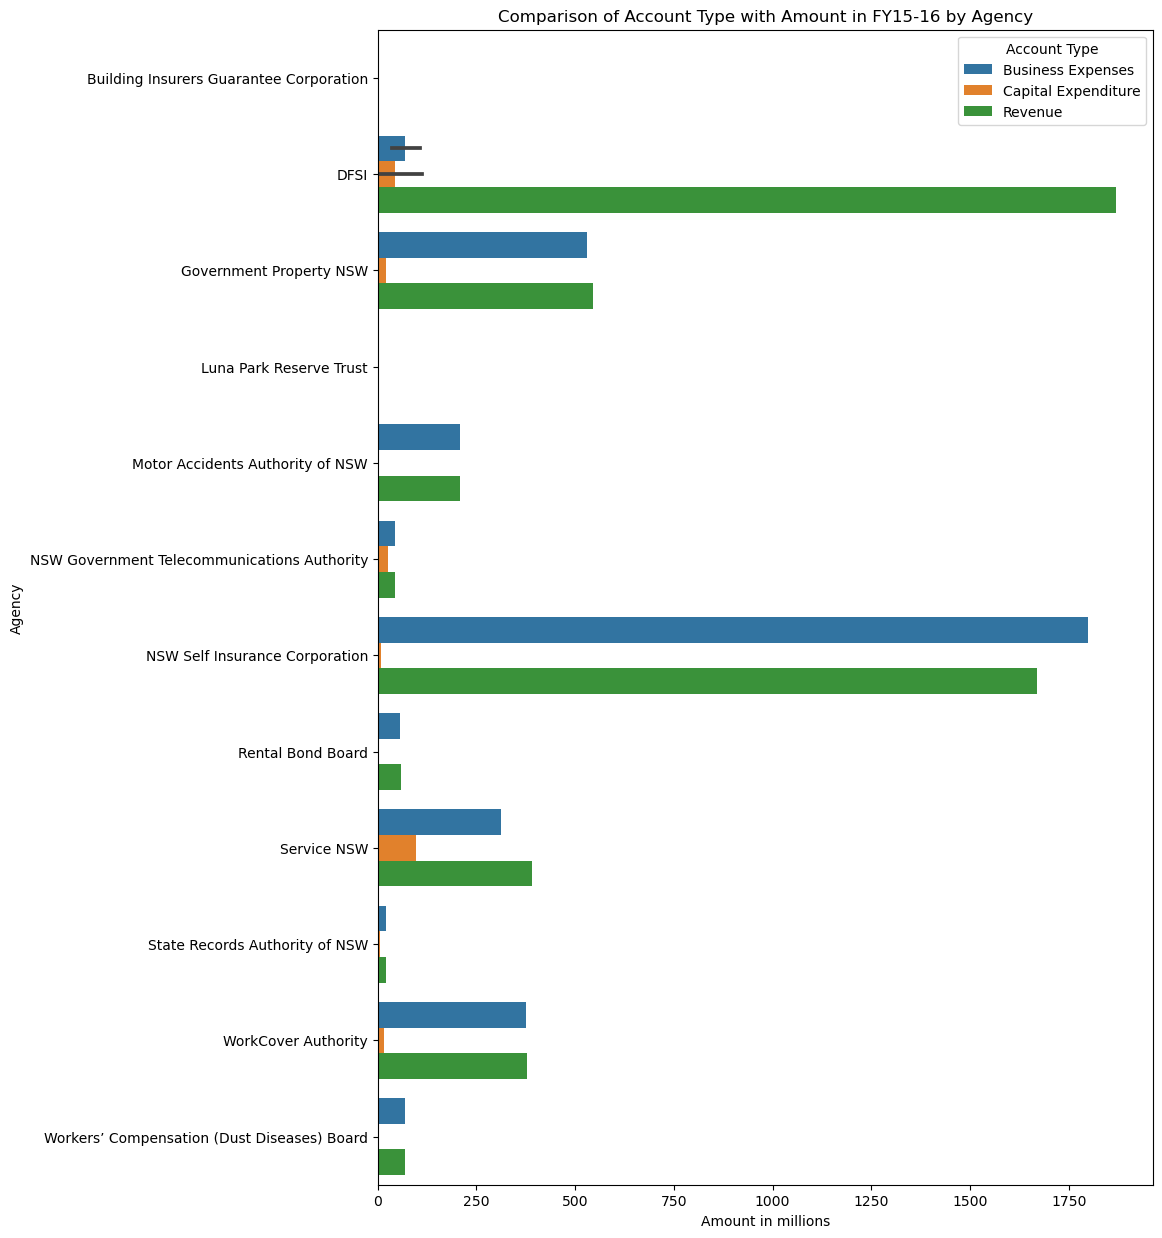

In [7]:
# 1- compare the account type with amount in different fiscal years based on agencies

import matplotlib.pyplot as plt
import seaborn as sns

filtered_data = df[(df['Fiscal Year'] == 'FY15-16') & (df['Account Type'] != 'All Expenses')]

plt.figure(figsize=(10, 15))
sns.barplot(x='Amount (m)', y='Agency', hue='Account Type', orient='h', data=filtered_data)

plt.title('Comparison of Account Type with Amount in FY15-16 by Agency')
plt.xlabel('Amount in millions')
plt.ylabel('Agency')

plt.show()


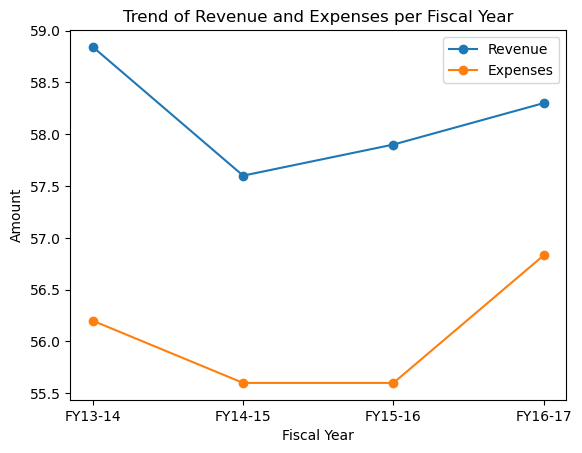

In [113]:
#2- Trend of all expenditure and revenue related to agency per fiscal year

filtered_data= df[(df['Agency']== 'Rental Bond Board') & (df['Account Type'].isin(['Revenue', 'All Expenses']))]

# Onto the plotting 
grouped_data = filtered_data.groupby(['Fiscal Year', 'Account Type'])['Amount (m)'].sum().unstack()

plt.plot(grouped_data.index, grouped_data['Revenue'], marker= 'o', label='Revenue')
plt.plot(grouped_data.index, grouped_data['All Expenses'], marker='o', label='Expenses')
plt.xlabel('Fiscal Year')
plt.ylabel('Amount')
plt.title('Trend of Revenue and Expenses per Fiscal Year')
plt.legend()
plt.show()



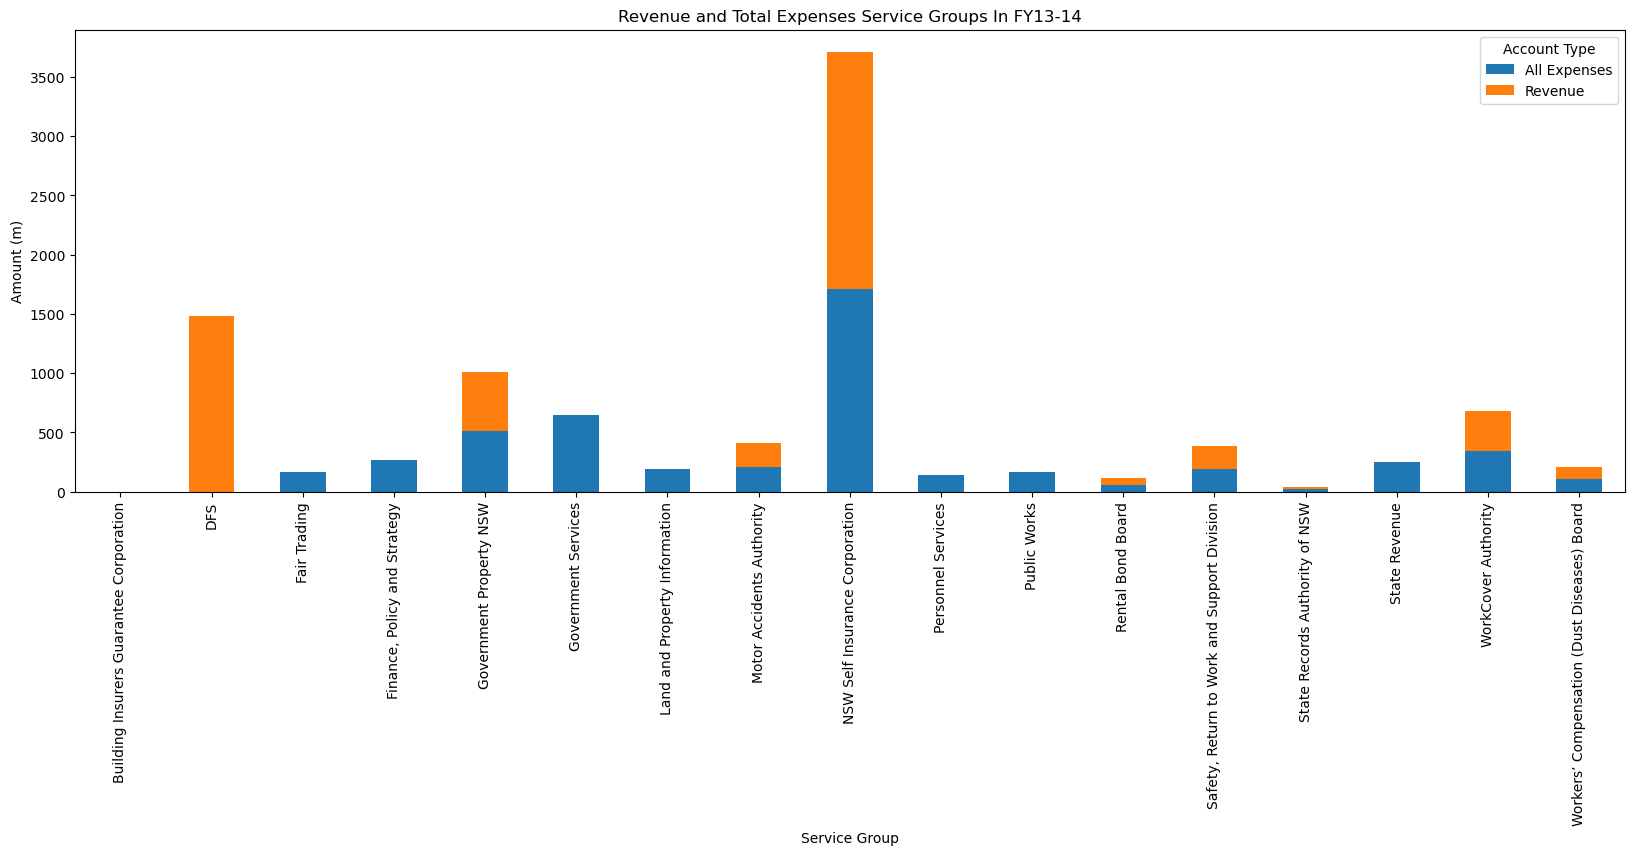

In [18]:
#3 FInd and visualize the  distribution of Revenue and expenses across service group


filtered_data_a = df[(df['Fiscal Year'] == 'FY13-14') &
                     (df['Account Type'].isin(['All Expenses', 'Revenue']))]

grouped_data_a = filtered_data_a.groupby(['Service Group', 'Account Type'])['Amount (m)'].sum().unstack()



grouped_data_a.plot(kind='bar', stacked=True, figsize=(20,6))


plt.title('Revenue and Total Expenses Service Groups In FY13-14')
plt.xlabel('Service Group')
plt.ylabel('Amount (m)')

plt.show()


In [17]:
grouped_data_a

Account Type                                 All Expenses   Revenue
Service Group                                                      
Building Insurers Guarantee Corporation             0.700     0.620
DFS                                                   NaN  1480.558
Fair Trading                                      163.558       NaN
Finance, Policy and Strategy                      263.872       NaN
Government Property NSW                           510.493   503.097
Government Services                               647.195       NaN
Land and Property Information                     190.400       NaN
Motor Accidents Authority                         207.231   206.036
NSW Self Insurance Corporation                   1713.751  1999.240
Personnel Services                                141.000       NaN
Public Works                                      168.787       NaN
Rental Bond Board                                  56.200    58.842
Safety, Return to Work and Support Division       191.100   191.141
State Records Authority of NSW                     20.045    20.254
State Revenue                                     252.781       NaN
WorkCover Authority                               343.200   334.235
Workers’ Compensation (Dust Diseases) Board       105.910   106.088

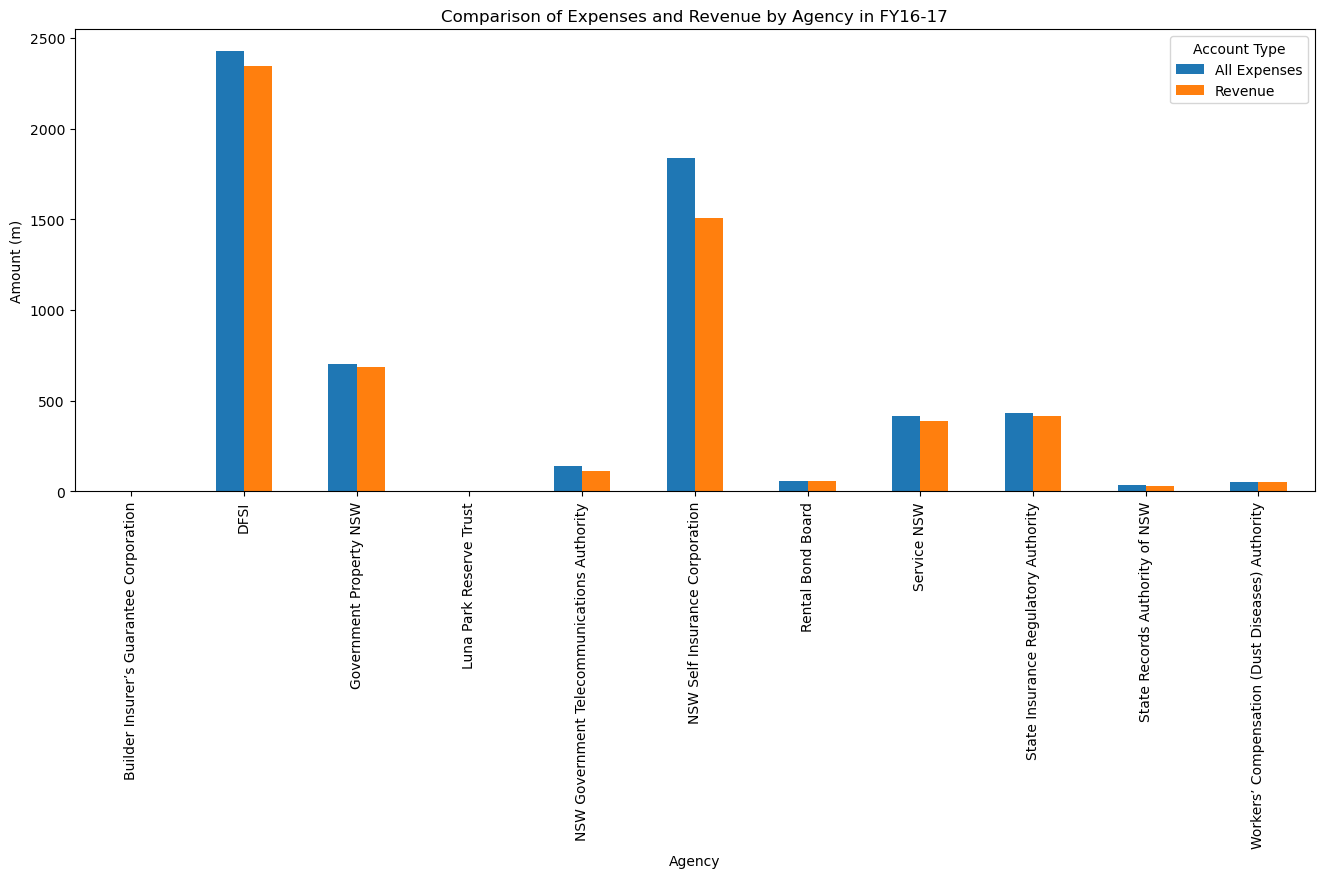

In [111]:
#4-compare the exp and rev of different agencies with cluster(financial, service and innovation)-
#grouped bar chart (one bar exp and other rev) - for specific fiscal year

filtered_data= df[(df['Fiscal Year']== 'FY16-17') & 
                  (df['Cluster']== 'Finance, Services and Innovation') & 
                  (df['Account Type'].isin(['All Expenses', 'Revenue']))]

grouped_data = filtered_data.groupby(['Agency', 'Account Type'])['Amount (m)'].sum().unstack()

#Bar plot
grouped_data.plot(kind= 'bar', figsize= (16,6))
plt.xlabel('Agency')
plt.ylabel('Amount (m)')
plt.title('Comparison of Expenses and Revenue by Agency in FY16-17')
plt.show()


C:\Users\adbsa\AppData\Local\Temp\ipykernel_7412\2532725347.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = filtered_data.groupby('Account Type').sum()


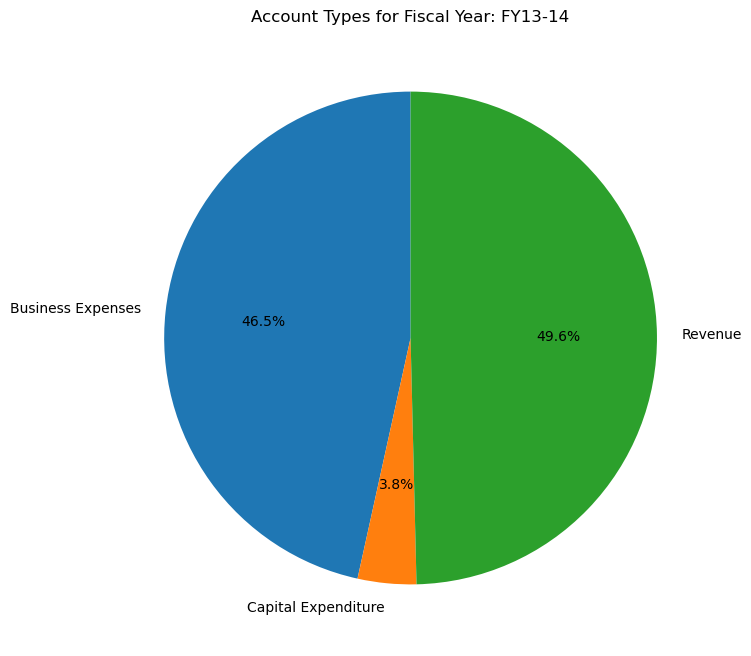

In [64]:
#5-% Distribution of Expenditures and Revenues across different agencies in all fiscal years

filtered_data = df[(df['Fiscal Year'] == 'FY13-14') & (df['Account Type'] != 'All Expenses')]
grouped_data = filtered_data.groupby('Account Type').sum()
amounts = grouped_data['Amount (m)']
labels = amounts.index

plt.figure(figsize=(8, 8))
plt.pie(amounts, labels=labels, startangle=90, autopct='%1.1f%%')
plt.title('Account Types for Fiscal Year: FY13-14')

plt.show()


C:\Users\adbsa\AppData\Local\Temp\ipykernel_7412\817708805.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = filtered_data.groupby('Account Type').sum()
C:\Users\adbsa\AppData\Local\Temp\ipykernel_7412\817708805.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = filtered_data.groupby('Account Type').sum()
C:\Users\adbsa\AppData\Local\Temp\ipykernel_7412\817708805.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should

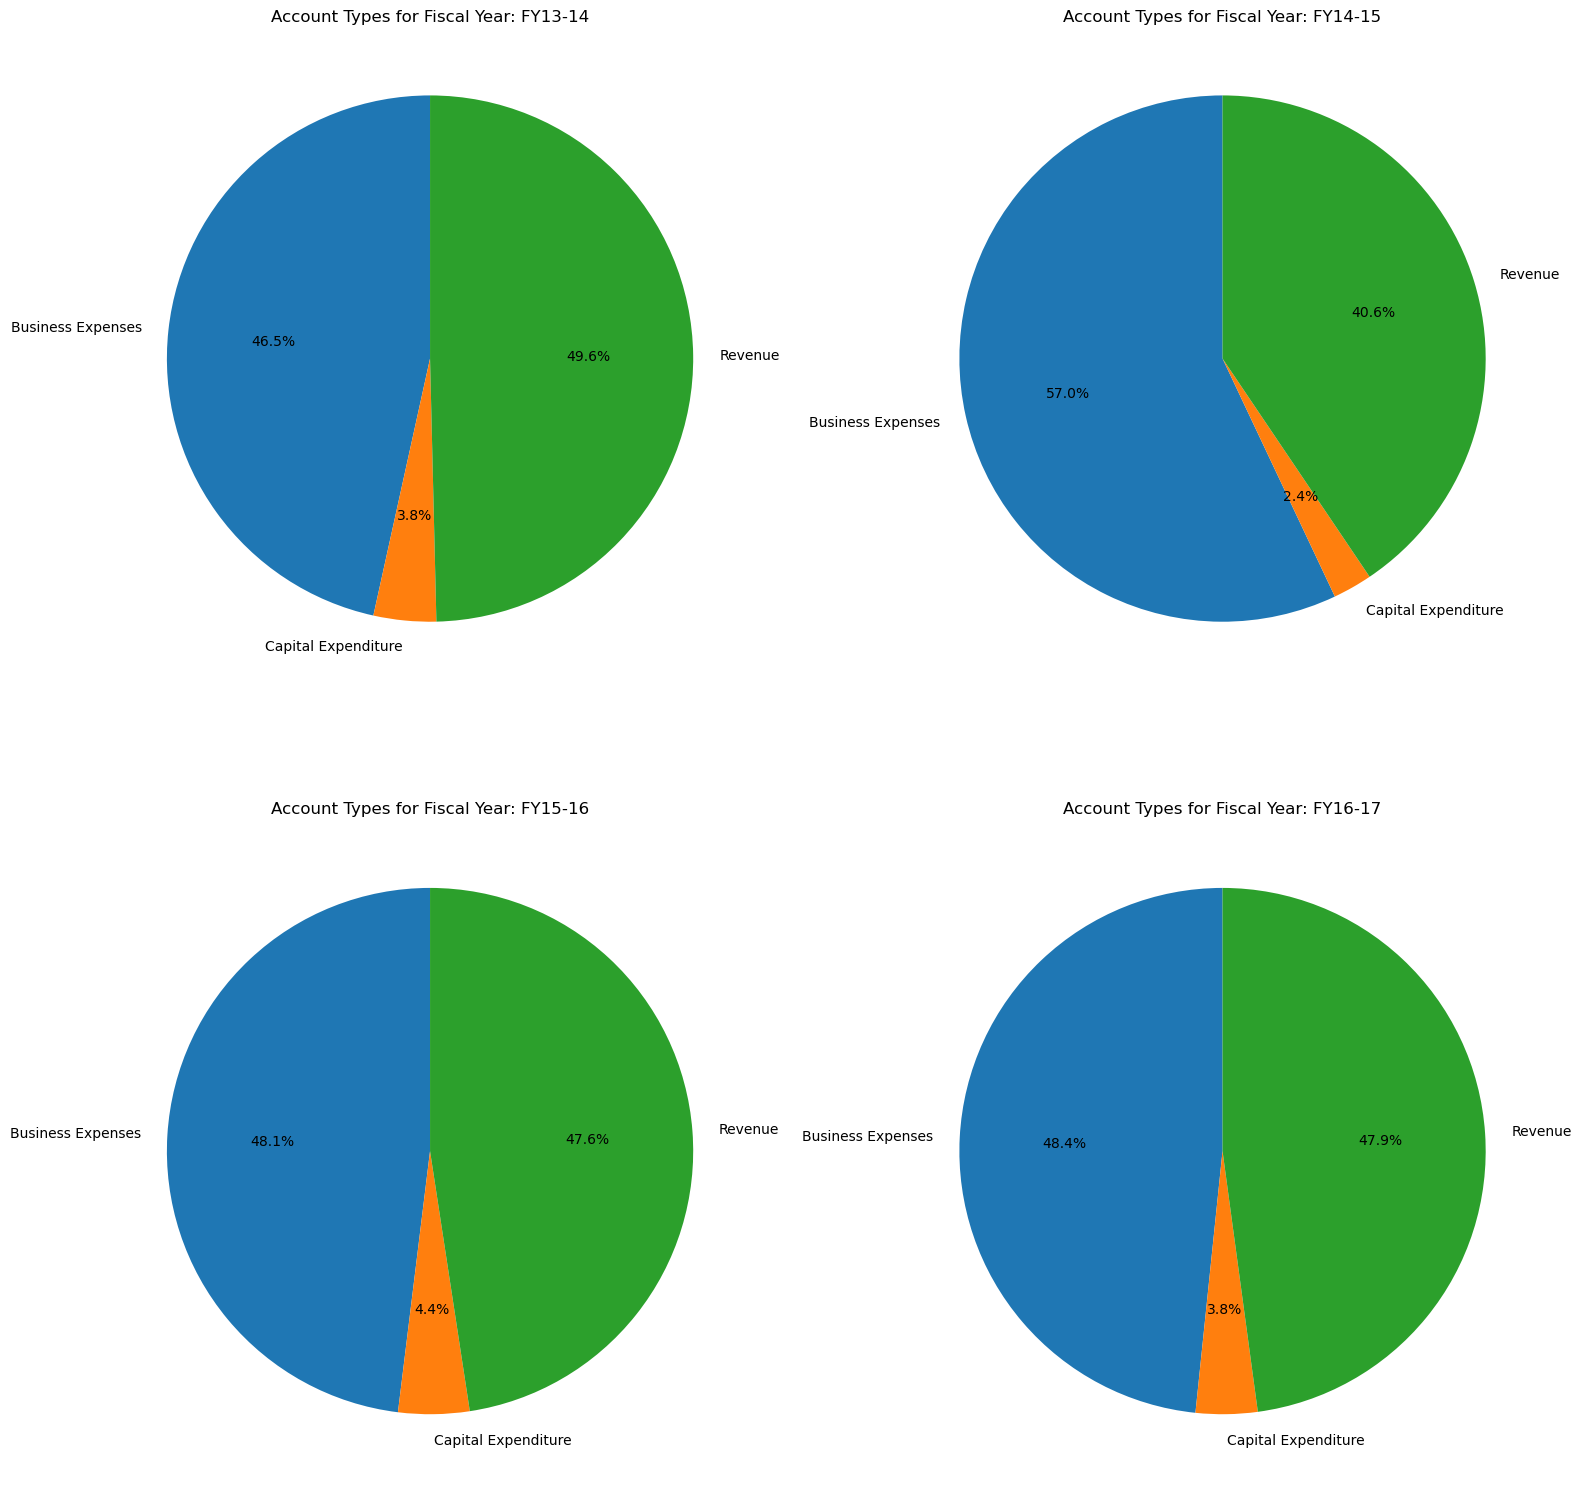

In [63]:
#This I have used CHATGPT

years = ['FY13-14', 'FY14-15', 'FY15-16', 'FY16-17']  # List of the four different fiscal years

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
axes = axes.flatten()

for i, year in enumerate(years):
    filtered_data = df[(df['Fiscal Year'] == year) & (df['Account Type'] != 'All Expenses')]
    grouped_data = filtered_data.groupby('Account Type').sum()
    amounts = grouped_data['Amount (m)']
    labels = amounts.index

    axes[i].pie(amounts, labels=labels, startangle=90, autopct='%1.1f%%')
    axes[i].set_title(f'Account Types for Fiscal Year: {year}')

plt.tight_layout()
plt.show()


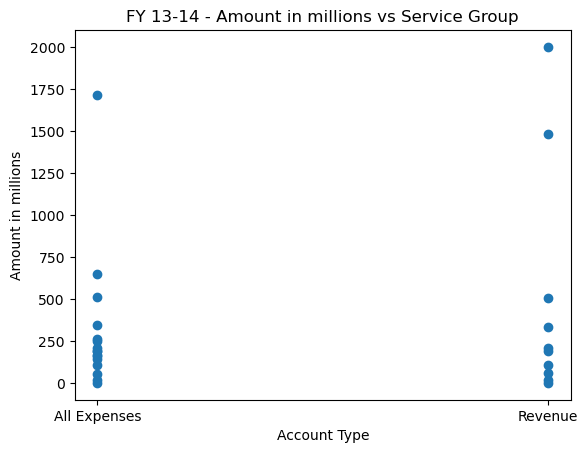

In [69]:
#6- #Scatter Plot- Relationship between Amount in millions and Account type to identify the correlations or outliers

# Filter the data based on 'Account Type' and 'Fiscal Year'

filtered_data = df[(df['Account Type'].isin(['All Expenses', 'Revenue'])) & (df['Fiscal Year'] == 'FY13-14')]

plt.scatter(filtered_data['Account Type'], filtered_data['Amount (m)'])

plt.title('FY 13-14 - Amount in millions vs Service Group')
plt.xlabel('Account Type')
plt.ylabel('Amount in millions')

plt.show()


In [75]:
sorted_data = filtered_data.sort_values('Amount (m)', ascending=False)
sorted_data

Fiscal Year               Cluster  \
278     FY13-14  Finance and Services   
268     FY13-14  Finance and Services   
274     FY13-14  Finance and Services   
259     FY13-14  Finance and Services   
266     FY13-14  Finance and Services   
276     FY13-14  Finance and Services   
272     FY13-14  Finance and Services   
282     FY13-14  Finance and Services   
258     FY13-14  Finance and Services   
260     FY13-14  Finance and Services   
267     FY13-14  Finance and Services   
277     FY13-14  Finance and Services   
280     FY13-14  Finance and Services   
270     FY13-14  Finance and Services   
263     FY13-14  Finance and Services   
262     FY13-14  Finance and Services   
261     FY13-14  Finance and Services   
264     FY13-14  Finance and Services   
283     FY13-14  Finance and Services   
273     FY13-14  Finance and Services   
279     FY13-14  Finance and Services   
269     FY13-14  Finance and Services   
281     FY13-14  Finance and Services   
271     FY13-14  Finance and Services   
265     FY13-14  Finance and Services   
275     FY13-14  Finance and Services   

                                          Agency  \
278               NSW Self Insurance Corporation   
268               NSW Self Insurance Corporation   
274                                          DFS   
259                                          DFS   
266                      Government Property NSW   
276                      Government Property NSW   
272                          WorkCover Authority   
282                          WorkCover Authority   
258                                          DFS   
260                                          DFS   
267                    Motor Accidents Authority   
277                    Motor Accidents Authority   
280  Safety, Return to Work and Support Division   
270  Safety, Return to Work and Support Division   
263                                          DFS   
262                                          DFS   
261                                          DFS   
264                                          DFS   
283  Workers’ Compensation (Dust Diseases) Board   
273  Workers’ Compensation (Dust Diseases) Board   
279                            Rental Bond Board   
269                            Rental Bond Board   
281               State Records Authority of NSW   
271               State Records Authority of NSW   
265      Building Insurers Guarantee Corporation   
275      Building Insurers Guarantee Corporation   

                                   Service Group Sub-service group  \
278               NSW Self Insurance Corporation               NaN   
268               NSW Self Insurance Corporation               NaN   
274                                          DFS               NaN   
259                          Government Services               NaN   
266                      Government Property NSW               NaN   
276                      Government Property NSW               NaN   
272                          WorkCover Authority               NaN   
282                          WorkCover Authority               NaN   
258                 Finance, Policy and Strategy               NaN   
260                                State Revenue               NaN   
267                    Motor Accidents Authority               NaN   
277                    Motor Accidents Authority               NaN   
280  Safety, Return to Work and Support Division               NaN   
270  Safety, Return to Work and Support Division               NaN   
263                Land and Property Information               NaN   
262                                 Public Works               NaN   
261                                 Fair Trading               NaN   
264                           Personnel Services               NaN   
283  Workers’ Compensation (Dust Diseases) Board               NaN   
273  Workers’ Compensation (Dust Diseases) Board               NaN   
279                  

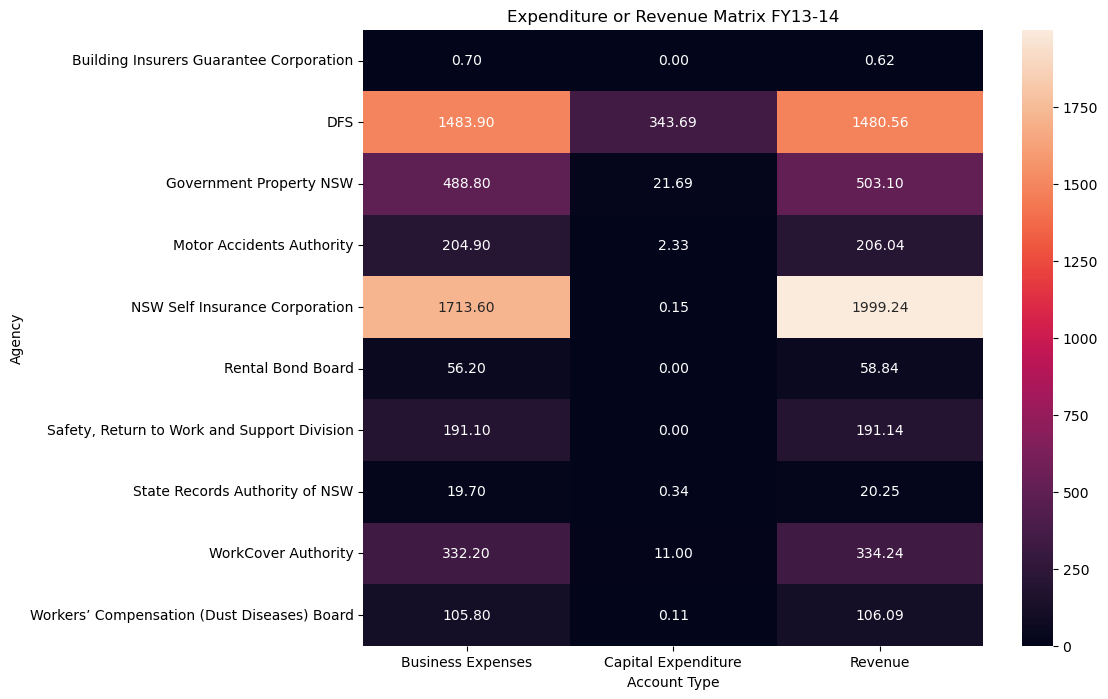

In [68]:
#7 Heat map: Visualize the expenditure or revenue matrix for different agencies and account types using a heat map to identify patterns and variations

dfa = df[df['Fiscal Year'] == 'FY13-14']

pivot_table = pd.pivot_table(dfa[dfa['Account Type'] != 'All Expenses'], values='Amount (m)', index='Agency', columns='Account Type', aggfunc='sum')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cbar=True, fmt='.2f')

plt.title('Expenditure or Revenue Matrix FY13-14')
plt.xlabel('Account Type')
plt.ylabel('Agency')

plt.show()


In [73]:
pivot_table

Account Type                                 Business Expenses  \
Agency                                                           
Building Insurers Guarantee Corporation                    0.7   
DFS                                                     1483.9   
Government Property NSW                                  488.8   
Motor Accidents Authority                                204.9   
NSW Self Insurance Corporation                          1713.6   
Rental Bond Board                                         56.2   
Safety, Return to Work and Support Division              191.1   
State Records Authority of NSW                            19.7   
WorkCover Authority                                      332.2   
Workers’ Compensation (Dust Diseases) Board              105.8   

Account Type                                 Capital Expenditure   Revenue  
Agency                                                                      
Building Insurers Guarantee Corporation                    0.000     0.620  
DFS                                                      343.693  1480.558  
Government Property NSW                                   21.693   503.097  
Motor Accidents Authority                                  2.331   206.036  
NSW Self Insurance Corporation                             0.151  1999.240  
Rental Bond Board                                          0.000    58.842  
Safety, Return to Work and Support Division                0.000   191.141  
State Records Authority of NSW                             0.345    20.254  
WorkCover Authority                                       11.000   334.235  
Workers’ Compensation (Dust Diseases) Board                0.110   106.088

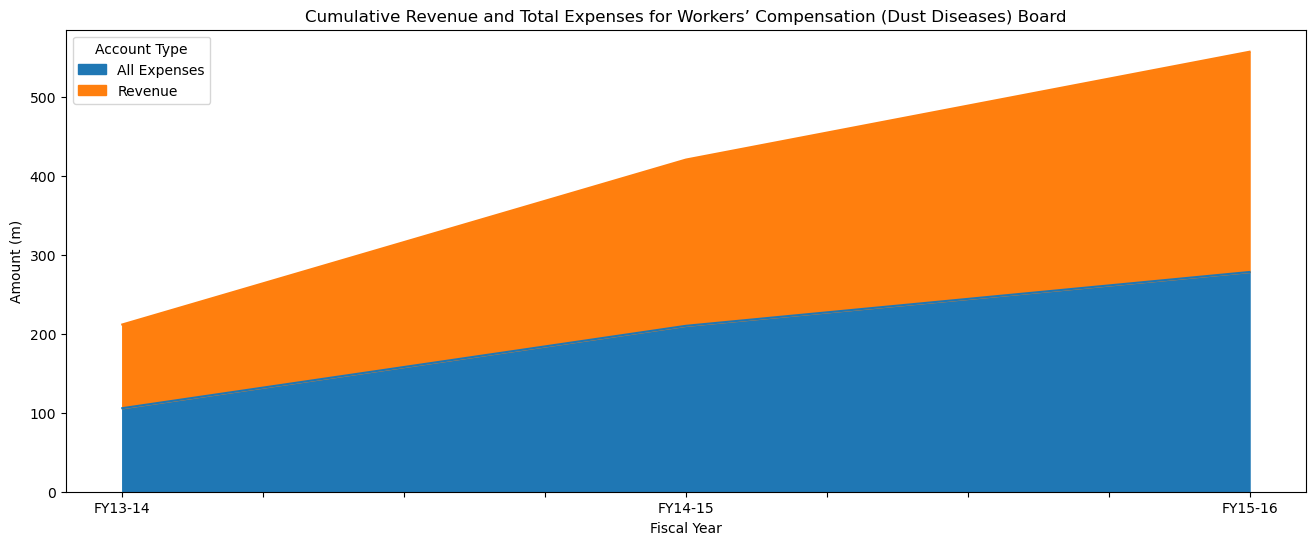

In [15]:
#8- cumulative expenditure and revenue over fiscal years for 'Workers’ Compensation (Dust Diseases) Board'

filtered_data_c = df[(df['Agency'] == 'Workers’ Compensation (Dust Diseases) Board') &
                     (df['Account Type'].isin(['All Expenses', 'Revenue']))]

grouped_data_c = filtered_data_c.groupby(['Fiscal Year', 'Account Type'])['Amount (m)'].sum().unstack()

cumulative_data = grouped_data_c.cumsum()

cumulative_data.plot(kind='area', stacked=True, figsize=(16,6))


plt.title('Cumulative Revenue and Total Expenses for Workers’ Compensation (Dust Diseases) Board')
plt.xlabel('Fiscal Year')
plt.ylabel('Amount (m)')

plt.show()


In [77]:
cumulative_data

Account Type  All Expenses  Revenue
Fiscal Year                        
FY13-14             105.91  106.088
FY14-15             210.31  210.741
FY15-16             278.55  279.232

In [4]:
##9 Treemap: Create a treemap visualization to display the hierarchial structure of expenditure or revenue such as 
#'cluster'> 'Agency' > 'Service Group' > 'Sub service Group'

import plotly.express as px

filtered_data = df[['Cluster', 'Agency', 'Service Group', 'Sub-service group', 'Amount (m)']]
grouped_data = filtered_data.groupby(['Cluster', 'Agency', 'Service Group', 'Sub-service group']).sum().reset_index()

nonzero_sum_data = grouped_data[grouped_data['Amount (m)'] != 0]

fig = px.treemap(nonzero_sum_data, path=['Cluster', 'Agency', 'Service Group', 'Sub-service group'],
                 values='Amount (m)', color='Amount (m)')


fig.update_layout(title='Expenditure or Revenue Treemap')

fig.show()



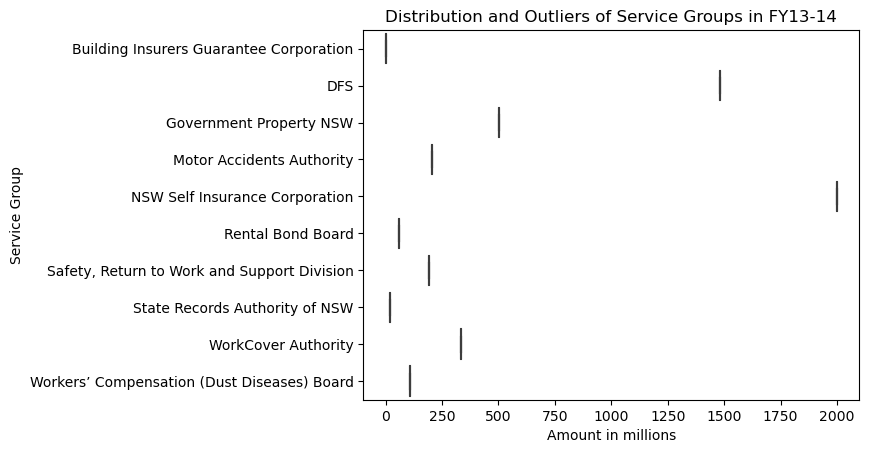

In [14]:
##10 Visualize the distribution and outliers of the Amount in millions for different service groups using box plots to identify significant variations
dfb = df[(df['Fiscal Year'] == 'FY13-14') & (df['Account Type']== 'Revenue')]


dfc= dfb.groupby('Service Group')['Amount (m)'].sum().reset_index()

sns.boxplot(x='Amount (m)', y='Service Group', data=dfc)

plt.title('Distribution and Outliers of Service Groups in FY13-14')
plt.xlabel('Amount in millions')
plt.ylabel('Service Group')

plt.show()


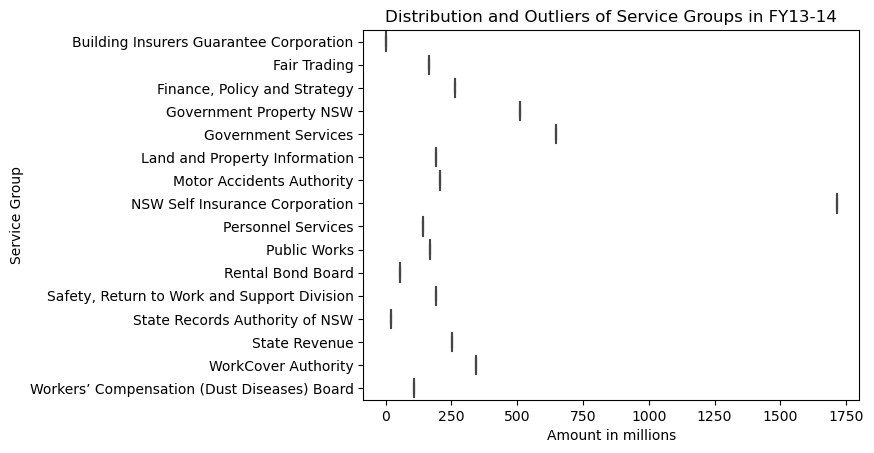

In [13]:
#For All Expenses
dfb = df[(df['Fiscal Year'] == 'FY13-14') & (df['Account Type']== 'All Expenses')]


dfc= dfb.groupby('Service Group')['Amount (m)'].sum().reset_index()

sns.boxplot(x='Amount (m)', y='Service Group', data=dfc)

plt.title('Distribution and Outliers of Service Groups in FY13-14')
plt.xlabel('Amount in millions')
plt.ylabel('Service Group')

plt.show()
